<a href="https://colab.research.google.com/github/sowndsgood/LinearAlgebra/blob/main/EigenValuesVectors/EigenValuesVectors_Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

###To display the image:

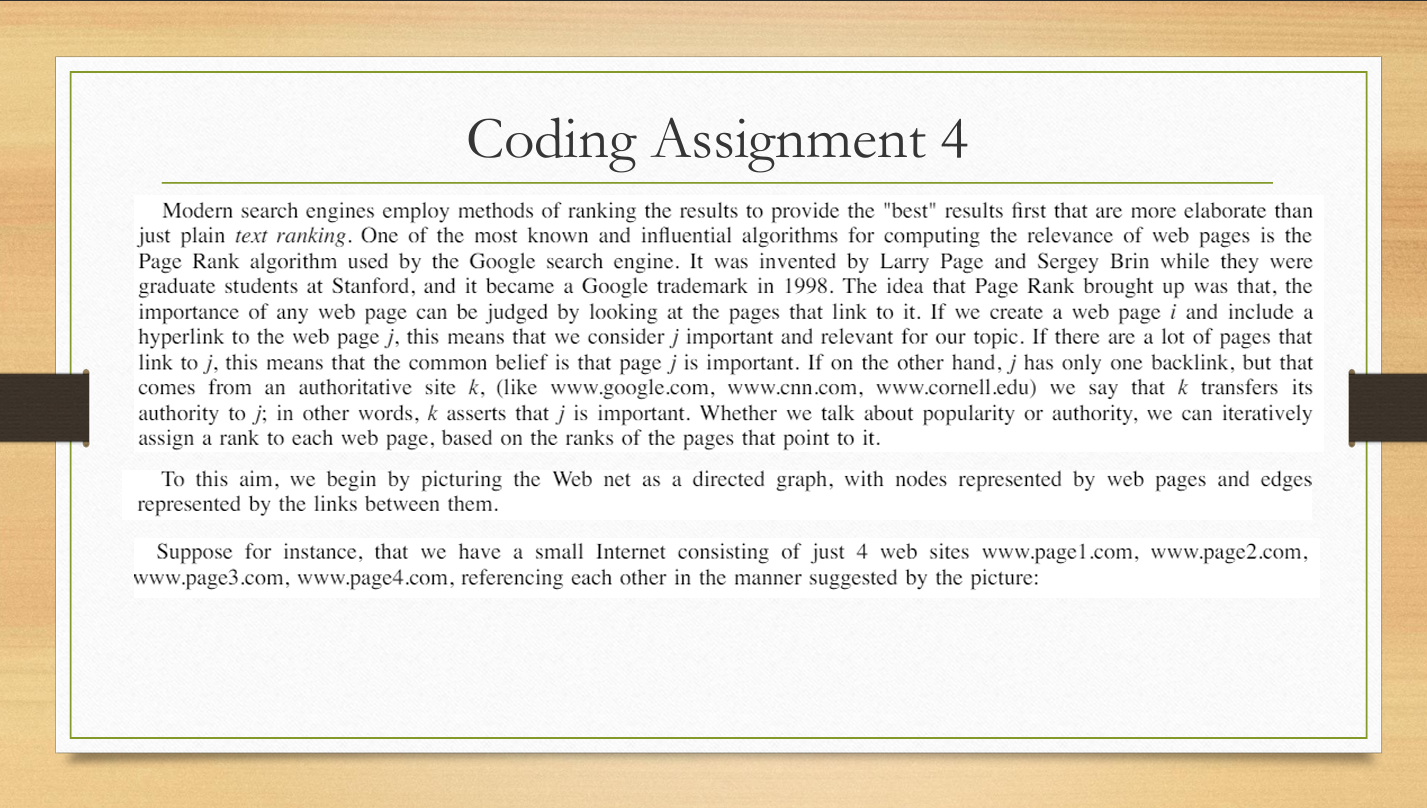

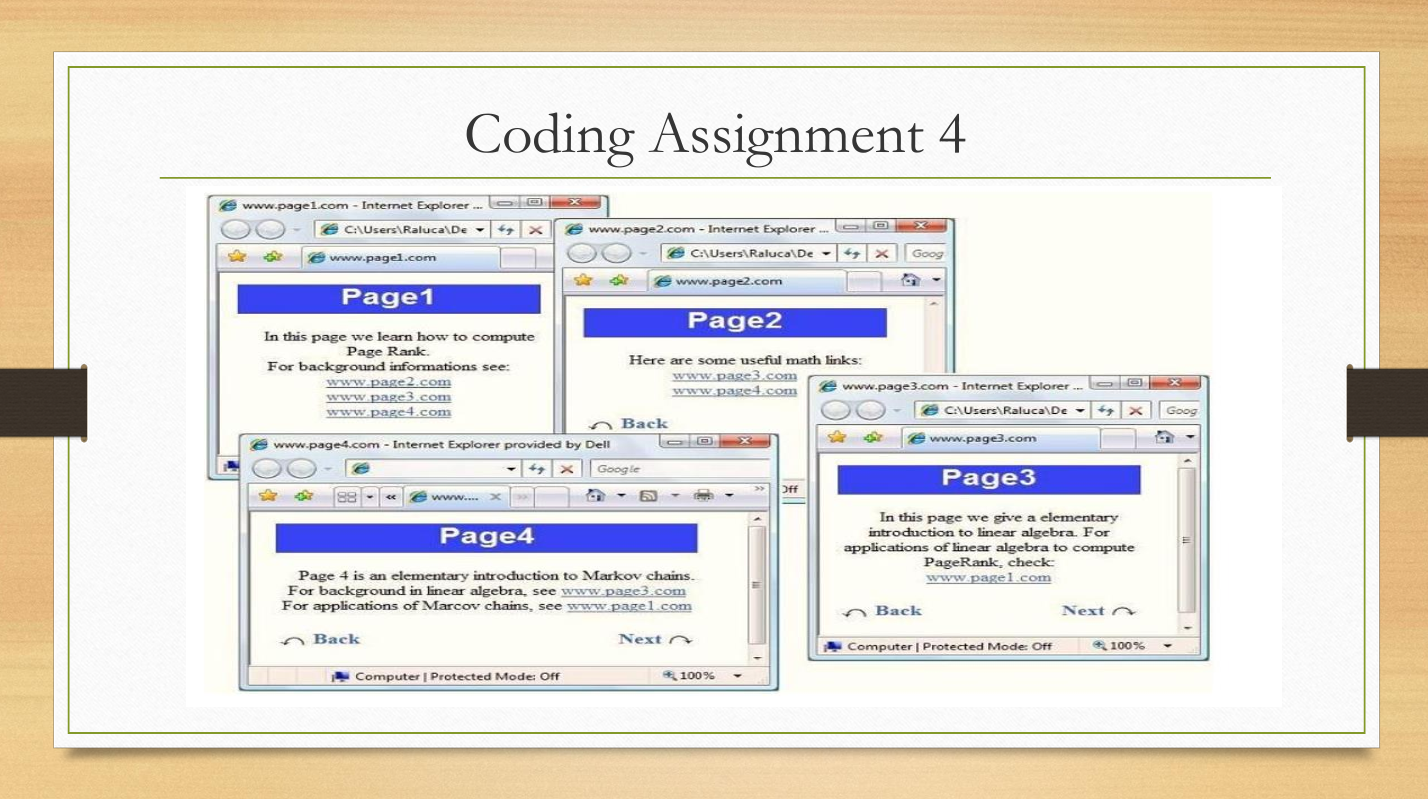

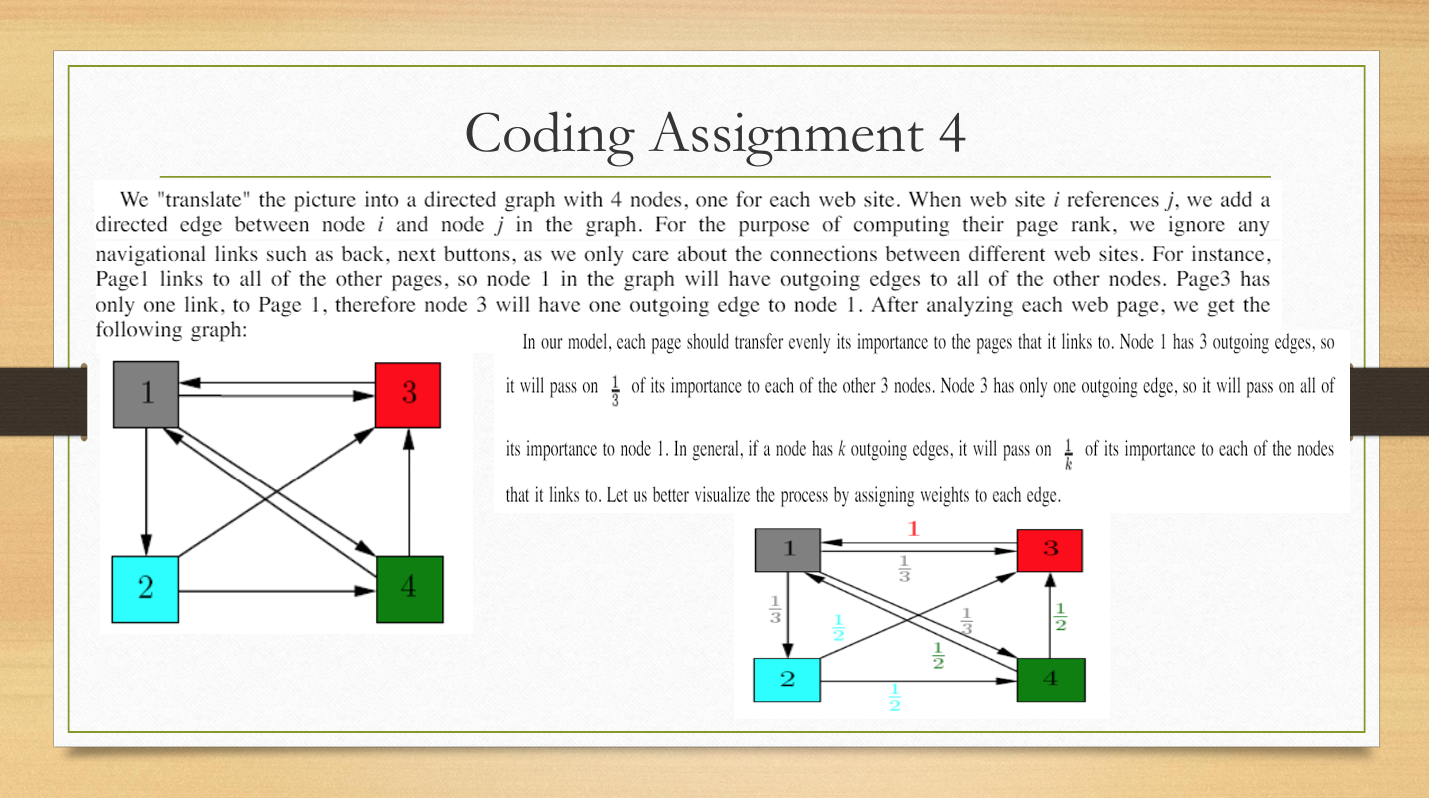

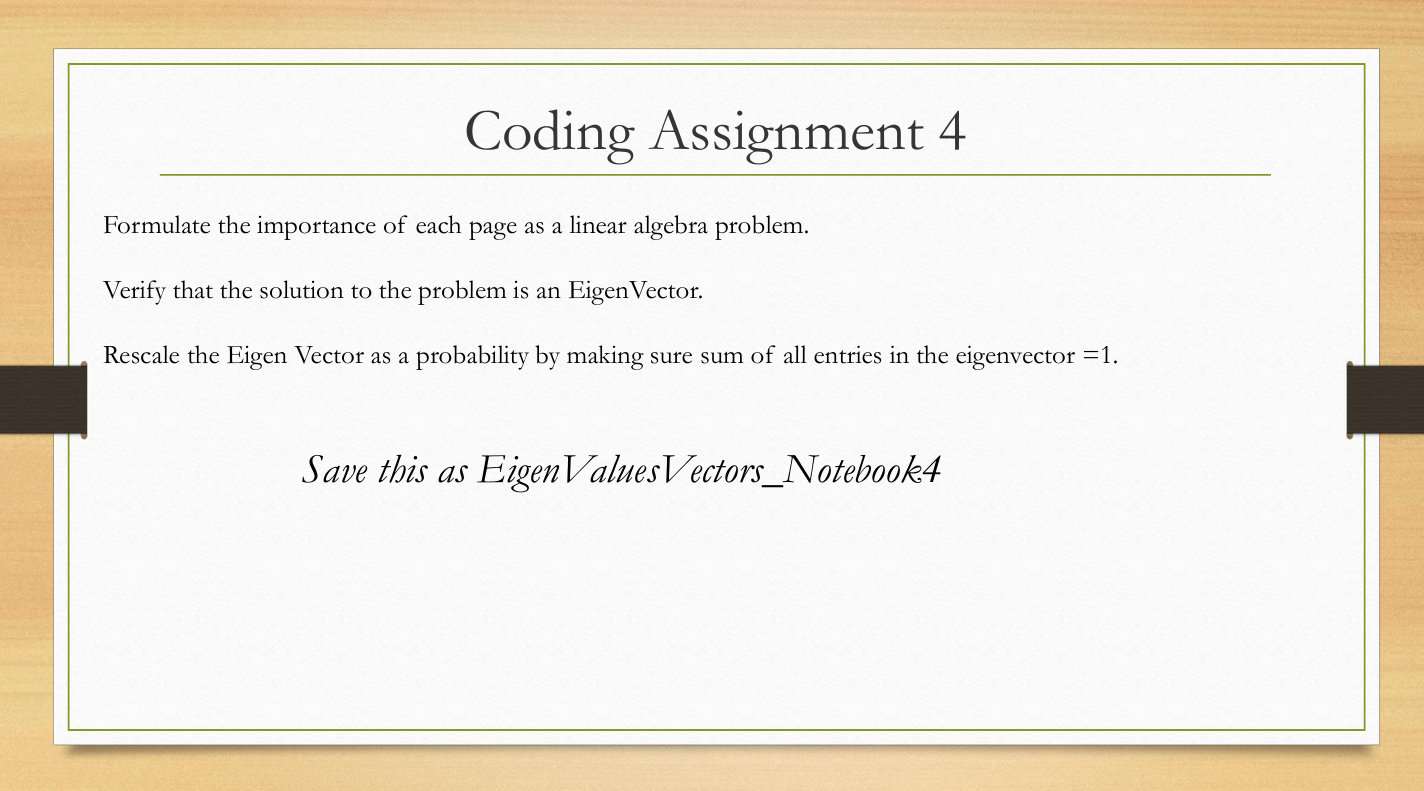

In [ ]:
from IPython.display import Image, display

# List of image file names
image_files = ['images/EVV4(1).png', 'images/EVV4(2).png', 'images/EVV4(3).png', 'images/EVV4(4).png']

# Display each image
for file in image_files:
    display(Image(file))


#Solution Summary:

1. **Importing Libraries**: We import NumPy and specifically the `eig` function from NumPy's Linear Algebra module to compute eigenvalues and eigenvectors.

2. **Define Functions**:
   - `eigen_values_vectors(M)`: This function takes a matrix `M` as input, calculates its eigenvalues and eigenvectors, selects the eigenvector corresponding to the eigenvalue closest to 1, and returns it. It also prints the eigenvalues and eigenvectors for visualization.
   - `scale_vect(V)`: This function takes a vector `V` as input and scales it such that the sum of its elements is 1. This is used to normalize the PageRank values.

3. **Transition Matrix**: We define the transition matrix `M`, representing the connectivity of web pages in a directed graph. Each element \( M_{ij} \) of this matrix represents the probability of transitioning from page \( j \) to page \( i \).

4. **Main Code**:
   - **Calculate Eigenvalues and Eigenvectors**: We compute the eigenvalues and eigenvectors of the transition matrix `M` using the `eigen_values_vectors` function.
   - **Scale the Eigenvector**: We scale the obtained eigenvector to ensure that the sum of PageRank values is 1, making it a probability distribution.
   - **Display the Importance of Each Page**: We iterate through the list of pages and their corresponding scaled PageRank values, printing out the importance of each page.
   - **Verify Sum of PageRank Values**: We check that the sum of the scaled PageRank values is approximately 1, ensuring that they form a valid probability distribution.

Overall, this solution demonstrates the computation of PageRank using eigenvectors, providing a concise and effective method for ranking the importance of web pages in a directed graph.

###Importing Libraries:

In [19]:
# Importing the numpy library and aliasing it as np
import numpy as np

# Importing the eig function from the numpy.linalg module
# This function is used to compute eigenvalues and eigenvectors
from numpy.linalg import eig

###Define Functions:

####1. Function to Calculate Eigenvalues and Eigenvectors:

In [20]:
def eigen_values_vectors(M):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(M)

    # Display Eigenvalues
    print("Eigenvalues:")
    print("[", end="")
    for val in eigenvalues:
        print(" ({:.15f}+{:.15f}j)".format(val.real, val.imag), end="")
    print("]")

    # Display Eigenvectors
    print("\nEigenvectors:")
    print("[", end="")
    for row in eigenvectors:
        print("\n  [", end="")
        for val in row:
            print(" {:<20}".format(val), end="")
        print("]", end="")
    print("\n]")

    # Extract the real part of eigenvalues
    real_parts = np.real(eigenvalues)

    # Find the index where the real part is closest to 1
    index_of_1 = np.argmin(np.abs(real_parts - 1))
    return np.real(eigenvectors[:, index_of_1])


####2. Function to Scale Eigenvector:

In [21]:
def scale_vect(V):
    return V / sum(V)

###Transition Matrix:

In [22]:
# Pages linked to each page
pages = [
    [2, 3, 4],  # Page 1 links to pages 2, 3, 4
    [3, 4],     # Page 2 links to pages 3, 4
    [1],        # Page 3 links to page 1
    [1, 3]      # Page 4 links to pages 1, 3
]

####Function to generate equation from pages:

In [31]:
def generate_equations(pages):
    equations = []
    n = len(pages)  # Total number of pages

    # Iterate over each page
    for i, links in enumerate(pages):
        equation = f"Equation of page {i+1} = "  # Initialize the equation for the current page
        terms = []

        # Iterate over all pages to check if they link to the current page
        for link in range(n):
            if i + 1 in pages[link]:  # Check if page 'i+1' is in the list of links of page 'link+1'
                terms.append(f"{1/len(pages[link])} * Page {link + 1}")  # Add the contribution from the linking page

        equation += " + ".join(terms)  # Join all the terms with ' +' separator
        equations.append(equation)  # Add the equation to the list

    return equations

In [24]:
# Generate equations
equations = generate_equations(pages)

# Print equations
for equation in equations:
    print(equation)

Equation of page 1 = 1.0 * Page 3 + 0.5 * Page 4
Equation of page 2 = 0.3333333333333333 * Page 1
Equation of page 3 = 0.3333333333333333 * Page 1 + 0.5 * Page 2 + 0.5 * Page 4
Equation of page 4 = 0.3333333333333333 * Page 1 + 0.5 * Page 2


####Function to generate matrix from equation:

In [25]:
def form_transition_matrix(equations, n):
    M = [[0] * n for _ in range(n)]  # Initialize an n x n matrix with zeros

    for i, equation in enumerate(equations):
        # Split the equation to extract the terms
        terms = equation.split('=')[1].strip().split('+')
        for term in terms:
            # Extract the page number and its contribution
            if 'Page' in term:
                page_num = int(term.split('Page')[-1].strip())  # Extract the page number
                contribution = float(term.split('*')[0].strip())  # Extract the contribution
                # Update the corresponding entry in the matrix
                M[i][page_num - 1] = contribution

    return M

# Form transition matrix from equations
transition_matrix = form_transition_matrix(equations, len(pages))

# Print transition matrix
print("Transition Matrix:")
for row in transition_matrix:
    print(row)

Transition Matrix:
[0, 0, 1.0, 0.5]
[0.3333333333333333, 0, 0, 0]
[0.3333333333333333, 0.5, 0, 0.5]
[0.3333333333333333, 0.5, 0, 0]


###Main Code:

####1. Calculate Eigenvalues and Eigenvectors:

In [26]:
# Step 1: Calculate eigenvalues and eigenvectors
pagerank = eigen_values_vectors(transition_matrix)

Eigenvalues:
[ (1.000000000000002+0.000000000000000j) (-0.360623333506111+0.410975545495054j) (-0.360623333506111+-0.410975545495054j) (-0.278753332987779+0.000000000000000j)]

Eigenvectors:
[
  [ (0.7210101217513317+0j) (-0.7552157082699412+0j) (-0.7552157082699412-0j) (0.5064856213328011+0j)]
  [ (0.24033670725044398+0j) (0.3036721038848581+0.34607247216185916j) (0.3036721038848581-0.34607247216185916j) (-0.6056556835920183+0j)]
  [ (0.5407575913134985+0j) (0.09315320807988625-0.2746779031834854j) (0.09315320807988625+0.2746779031834854j) (-0.3815391723730262+0j)]
  [ (0.36050506087566603+0j) (0.35839039630519604-0.07139456897837385j) (0.35839039630519604+0.07139456897837385j) (0.480709234632244+0j)]
]


####2. Scale the Eigenvector:

In [27]:
# Step 2: Scaling the Eigen Vectors

print("Eigen Vector with Eigen Value of 1:")
print(pagerank)

scaled_pagerank = scale_vect(pagerank)
print("After scaling:")
print(scaled_pagerank)

Eigen Vector with Eigen Value of 1:
[0.72101012 0.24033671 0.54075759 0.36050506]
After scaling:
[0.38709677 0.12903226 0.29032258 0.19354839]


####3. Display the Importance of Each Page:

In [28]:
# Names of the pages
pages = ['Page1', 'Page2', 'Page3', 'Page4']

# Step 3: Output the significance of each page
print("Significance of each page:")
for page, importance in zip(pages, scaled_pagerank):
    print(page, " = ", importance)

Significance of each page:
Page1  =  0.3870967741935484
Page2  =  0.12903225806451615
Page3  =  0.29032258064516114
Page4  =  0.19354838709677427


####4. Verify Sum of PageRank Values:

In [29]:
# Verify that the sum of PageRank values is approximately 1
print("Sum of scaled PageRank values:", sum(scaled_pagerank))

Sum of scaled PageRank values: 0.9999999999999999


###Ranking of Pages based on the score:

In [30]:
# Rank the pages based on their scores
ranked_pages = sorted(zip(pages, scaled_pagerank), key=lambda x: x[1], reverse=True)

# Display the ranked pages
print("Ranking of pages based on significance:")
for i, (page, score) in enumerate(ranked_pages, start=1):
    print("{}. {} = {:.3f}".format(i, page, score))

Ranking of pages based on significance:
1. Page1 = 0.387
2. Page3 = 0.290
3. Page4 = 0.194
4. Page2 = 0.129
